<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats




%matplotlib inline

In [2]:
asses = pd.read_csv("/Users/Yemre/Desktop/DSI-SF-5_2_Local/datasets/sf_assessor_value/assessor_value_cleaned.csv")

In [3]:
asses.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 17 columns):
baths             754147 non-null int64
beds              754147 non-null int64
lot_depth         754147 non-null float64
basement_area     754147 non-null float64
front_ft          754147 non-null float64
owner_pct         754147 non-null float64
rooms             754147 non-null int64
property_class    754147 non-null object
neighborhood      754147 non-null object
tax_rate          754147 non-null float64
volume            754147 non-null int64
sqft              754147 non-null int64
stories           754147 non-null int64
year_recorded     754147 non-null int64
year_built        754147 non-null int64
zone              754147 non-null object
value             754147 non-null float64
dtypes: float64(6), int64(8), object(3)
memory usage: 97.8+ MB


In [4]:
rooms = asses.rooms.values
price = asses.value.values

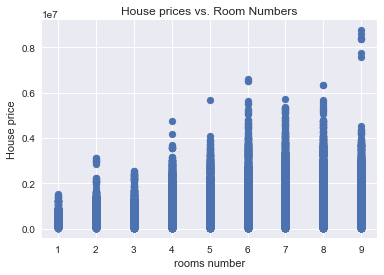

In [5]:
plt.scatter(rooms,price);
plt.title("House prices vs. Room Numbers");
plt.xlabel("rooms number");
plt.ylabel("House price");

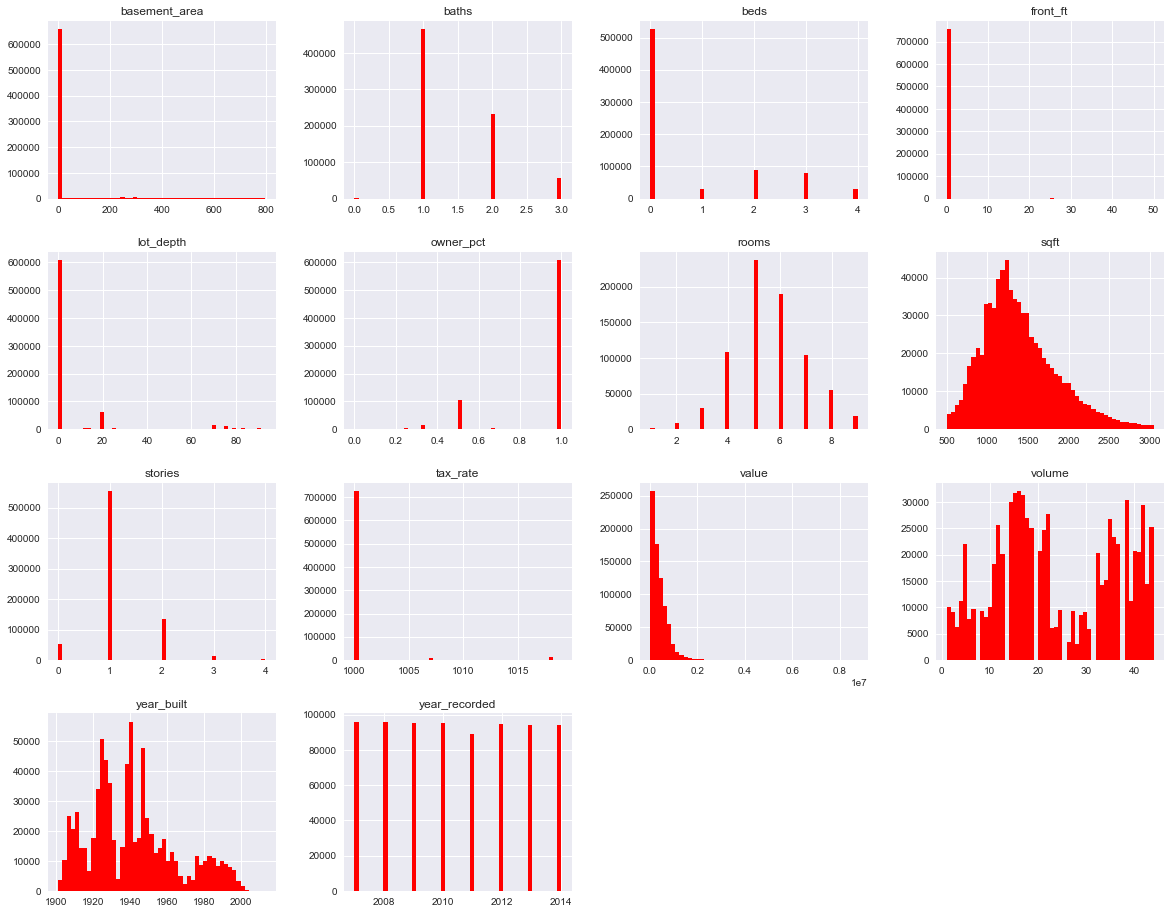

In [6]:
asses.hist(figsize=(20,16),bins=50,color= 'r');

In [7]:
def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    yhat = y_hat
    
    ax.scatter(x, y, color='steelblue', s=50)
    ax.scatter(x, yhat, color='darkred', s=50, alpha=0.3)
    
    ax.plot(x, yhat, color='darkred', linewidth=1.5, alpha=0.7)
    plt.show()

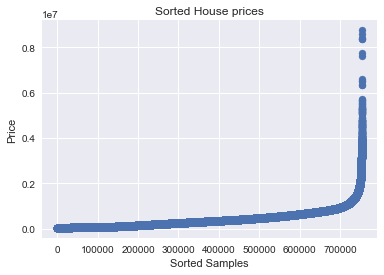

In [8]:
# sort values from smallest to largest
price = asses.value.sort_values()
plt.scatter(range(len(price)), price);
plt.title("Sorted House prices");
plt.xlabel("Sorted Samples");
plt.ylabel("Price");

In [9]:
import numpy as np
X = asses[[u'baths', u'beds', u'lot_depth', u'basement_area', u'front_ft',
       u'owner_pct', u'rooms', u'tax_rate',
       u'volume', u'sqft','value']]
X_corr = X.corr()

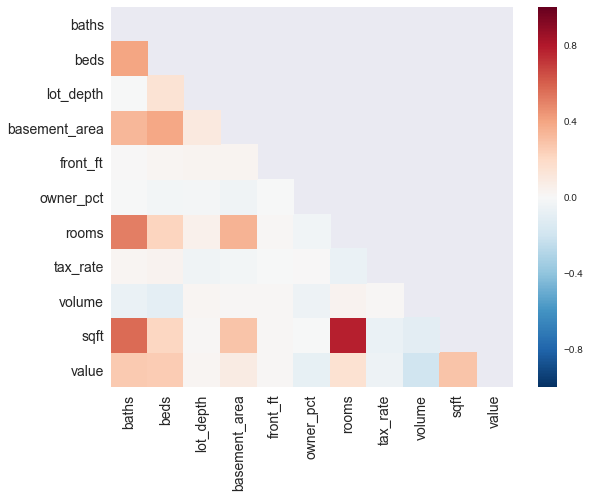

In [10]:
# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(X_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [11]:
X = asses[[u'baths', u'beds', u'lot_depth', u'basement_area', u'front_ft',
       u'owner_pct', u'rooms', u'tax_rate',
       u'volume', u'sqft']]
y = asses['value']

In [95]:
skl = StandardScaler()
X = skl.fit_transform(X)

In [96]:
def lin_model (X,y,test_size=0.2):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size= test_size,random_state=4)
    model = LinearRegression()
    model.fit(X_train,Y_train)
    y_hat = model.predict(X_test)
    
    return model, y_hat , X_train,X_test,Y_train,Y_test

In [97]:
model_asses, y_hat , X_train,X_test,Y_train,Y_test = lin_model(X,y)
print 'Coefs are: ', model_asses.coef_

Coefs are:  [  40414.45005689   68362.58239874    1475.77537504  -21925.22811131
    3749.68963221  -32698.44272605  -63391.62361312  -17535.48912793
  -51842.07859252  116974.20855051]


In [98]:
print "Score is: ",model_asses.score(X_test,Y_test)

Score is:  0.173020314077


In [99]:
print 'Mean Square Error is: ',mean_squared_error(Y_test,y_hat)

cros_val = cross_val_score(model_asses,X_test,Y_test)

Mean Square Error is:  111974523551.0


In [100]:
print "Cross val result is: ",cros_val

Cross val result is:  [ 0.1752097   0.16690708  0.17605648]


In [101]:
las_park = LassoCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
las_park.fit(X_train,Y_train)
las_park_y_hat = las_park.predict(X_test)

rid_park = RidgeCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
rid_park = rid_park.fit(X_train,Y_train)
rid_y_hat = rid_park.predict(X_test)

print 'Mean Sqr for Ridge: ' ,mean_squared_error(Y_test,rid_y_hat)

print '\nMean Sqr for Lasso: ' ,mean_squared_error(Y_test,las_park_y_hat)

print '\nLasso Score: ',las_park.score(X_test,Y_test)
print '\nRidge Score: ',rid_park.score(X_test,Y_test)

print '\nCross val for Ridge: ',cross_val_score(rid_park,X_test,Y_test).mean()
print '\nCross val for Lasso: ',cross_val_score(las_park,X_test,Y_test).mean()

Mean Sqr for Ridge:  111974532297.0

Mean Sqr for Lasso:  111974519389.0

Lasso Score:  0.173020344816

Ridge Score:  0.173020249485

Cross val for Ridge:  0.172724467575

Cross val for Lasso:  0.172726680098


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [20]:
df_fire = pd.read_csv("/Users/Yemre/Desktop/DSI-SF-5_2_Local/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv")

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df_crime = pd.read_csv("/Users/Yemre/Desktop/DSI-SF-5_2_Local/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv")

In [48]:
df_crime_arson = df_crime[(df_crime.Category == 'ARSON')]

df_fire.head()

count = 0
lst = []
for item in df_fire['Primary Situation']:
    if (len(item)>6):
        str_lst_to_int = int(item.split(" ")[0])
        lst.append(str_lst_to_int)
        if str_lst_to_int == 481:
            count+=1
print "There are ",count,"Arson cases in crime dataset."



There are  71 Arson cases in crime dataset.


In [54]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 63 columns):
Incident Number                                 406736 non-null int64
Exposure Number                                 406736 non-null int64
Address                                         406633 non-null object
Incident Date                                   406736 non-null object
Call Number                                     406736 non-null int64
Alarm DtTm                                      406736 non-null object
Arrival DtTm                                    406718 non-null object
Close DtTm                                      406736 non-null object
City                                            405509 non-null object
Zipcode                                         334349 non-null float64
Battalion                                       406736 non-null object
Station Area                                    406207 non-null object
Box                                    

In [60]:
col_names = ['Incident Number', 'Incident Date',u'Exposure Number', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel',]

In [72]:
df_fire_clean.head(10)

,Incident Number,Incident Date,Exposure Number,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel
0,9030109,04/12/2009,0,1,5,0,0,0,0
1,13067402,07/18/2013,0,3,11,0,0,0,0
2,12044490,05/13/2012,0,3,10,0,0,0,0
3,13033326,04/09/2013,0,3,10,0,0,0,0
4,11101416,11/01/2011,0,2,9,0,0,0,0
5,12077793,08/22/2012,0,3,11,0,0,0,0
6,7021713,03/15/2007,0,1,4,0,0,0,0
7,15065212,06/20/2015,0,8,28,1,2,1,2
8,10097225,10/31/2010,0,3,10,0,0,0,0
9,8033299,04/17/2008,0,1,4,0,0,0,0


In [75]:
df_fire_clean = df_fire[col_names]
df_fire_clean.info()
df_fire_clean_ni = df_fire_clean.groupby(['Incident Date'])['Incident Number'].count().reset_index()
df_fire_clean_exp = df_fire_clean.groupby(['Incident Date'])['Exposure Number','Suppression Units','Suppression Personnel','EMS Units','EMS Personnel','Other Units','Other Personnel'].sum().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 9 columns):
Incident Number          406736 non-null int64
Incident Date            406736 non-null object
Exposure Number          406736 non-null int64
Suppression Units        406736 non-null int64
Suppression Personnel    406736 non-null int64
EMS Units                406736 non-null int64
EMS Personnel            406736 non-null int64
Other Units              406736 non-null int64
Other Personnel          406736 non-null int64
dtypes: int64(8), object(1)
memory usage: 27.9+ MB


In [78]:
fire_merged = pd.merge(df_fire_clean_ni,df_fire_clean_exp,on= 'Incident Date')

In [79]:
fire_merged.head()

,Incident Date,Incident Number,Exposure Number,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel
0,01/01/2003,143,0,362,1172,6,13,0,0
1,01/01/2004,149,0,344,1318,11,21,6,12
2,01/01/2005,95,0,256,923,13,23,0,0
3,01/01/2006,96,0,231,841,3,6,0,0
4,01/01/2007,131,0,300,1087,21,41,3,5


In [81]:
predictor = fire_merged[['Exposure Number','Suppression Units','Suppression Personnel','EMS Units','EMS Personnel','Other Units','Other Personnel']]

target = fire_merged['Incident Number']

In [102]:
skl = StandardScaler()
predictor = skl.fit_transform(predictor)

In [103]:
model_F, y_hat_F , X_trainF,X_testF,Y_trainF,Y_testF = lin_model(predictor,target)

model_F.score(X_testF,Y_testF)



0.40749259182348263

In [104]:
print mean_squared_error(Y_testF,y_hat_F)

print cross_val_score(model,X_testF,Y_testF).mean()

141.728187379
0.264156661254


In [105]:
las_park = LassoCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
las_park.fit(X_trainF,Y_trainF)
las_park_y_hat = las_park.predict(X_testF)

rid_park = RidgeCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
rid_park = rid_park.fit(X_trainF,Y_trainF)
rid_y_hat = rid_park.predict(X_testF)

print 'Mean Sqr for Ridge: ' ,mean_squared_error(Y_testF,rid_y_hat)

print '\nMean Sqr for Lasso: ' ,mean_squared_error(Y_testF,las_park_y_hat)

print '\nLasso Score: ',las_park.score(X_testF,Y_testF)
print '\nRidge Score: ',rid_park.score(X_testF,Y_testF)

print '\nCross val for Ridge: ',cross_val_score(rid_park,X_testF,Y_testF).mean()
print '\nCross val for Lasso: ',cross_val_score(las_park,X_testF,Y_testF).mean()

Mean Sqr for Ridge:  142.651570071

Mean Sqr for Lasso:  150.908992746

Lasso Score:  0.369111410963

Ridge Score:  0.403632307601

Cross val for Ridge:  0.32358236778

Cross val for Lasso:  0.322490167427


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [106]:
df_park = pd.read_csv('/Users/Yemre/Desktop/DSI-SF-5_2_Local/datasets/san_francisco/san_francisco/parks/park_scores.csv')
df_park_info = pd.read_csv('/Users/Yemre/Desktop/DSI-SF-5_2_Local/datasets/san_francisco/san_francisco/parks/park_info.csv')

In [26]:
park_merged = pd.merge(df_park,df_park_info,on= 'ParkID')
park_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 5482
Data columns (total 16 columns):
ParkID             5483 non-null int64
PSA                5483 non-null object
Park               5483 non-null object
FQ                 5483 non-null object
Score              5482 non-null float64
ParkName           5483 non-null object
ParkType           5483 non-null object
ParkServiceArea    5483 non-null object
PSAManager         5483 non-null object
email              5483 non-null object
Number             5483 non-null object
Zipcode            5276 non-null float64
Acreage            5483 non-null float64
SupDist            5483 non-null float64
Location 1         4969 non-null object
Lat                0 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 728.2+ KB


In [27]:
park = park_merged.drop(['ParkServiceArea','PSAManager','email','Number','Zipcode','Location 1','Lat'],axis=1)

In [28]:
park = park.dropna(), park.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 5482
Data columns (total 9 columns):
ParkID      5483 non-null int64
PSA         5483 non-null object
Park        5483 non-null object
FQ          5483 non-null object
Score       5482 non-null float64
ParkName    5483 non-null object
ParkType    5483 non-null object
Acreage     5483 non-null float64
SupDist     5483 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 428.4+ KB


In [29]:
test = park_merged.groupby(['ParkID','PSA','ParkType','Acreage','SupDist'])['Score'].mean().reset_index()


In [30]:
test.head()

,ParkID,PSA,ParkType,Acreage,SupDist,Score
0,1,PSA5,Regional Park,77.94,8.0,0.915485
1,2,PSA5,Neighborhood Park or Playground,0.83,8.0,1.000000
2,4,PSA5,Neighborhood Park or Playground,4.40,8.0,0.925576
3,6,PSA5,Neighborhood Park or Playground,1.20,8.0,0.954545
4,7,PSA5,Neighborhood Park or Playground,6.80,8.0,0.914758


In [31]:
test.PSA.unique()
PSA_dict = {'PSA5':5, 'PSA4':4, 'PSA3':3, 'PSA6':6, 'PSA2':2, 'GGP':0, 'PSA1':1}
ParkType_dict = {'Regional Park':10, 'Neighborhood Park or Playground':9, 'Mini Park':8,
       'Parkway':7, 'Civic Plaza or Square':6}

In [32]:
test.PSA = test.PSA.map(PSA_dict)
test.ParkType = test.ParkType.map(ParkType_dict)

In [33]:
test.head()

,ParkID,PSA,ParkType,Acreage,SupDist,Score
0,1,5,10,77.94,8.0,0.915485
1,2,5,9,0.83,8.0,1.000000
2,4,5,9,4.40,8.0,0.925576
3,6,5,9,1.20,8.0,0.954545
4,7,5,9,6.80,8.0,0.914758


In [34]:
X_val = test[['PSA','Acreage','SupDist']].values
y_val = test.Score.values

In [107]:
skl = StandardScaler()
X_val = skl.fit_transform(X_val)

In [108]:
model,y_hat,X_train,X_test,Y_train,Y_test=lin_model(X_val,y_val)

In [109]:
model.score(X_test,Y_test)

-0.31360356816649482

In [110]:
print mean_squared_error(Y_test,y_hat)

print cross_val_score(model,X_val,y_val).mean()

0.00991337280413
0.00780813637459


In [111]:
las_park = LassoCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
las_park.fit(X_train,Y_train)
las_park_y_hat = las_park.predict(X_test)

rid_park = RidgeCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
rid_park = rid_park.fit(X_train,Y_train)
rid_y_hat = rid_park.predict(X_test)

print 'Mean Sqr for Ridge: ' ,mean_squared_error(Y_test,rid_y_hat)

print '\nMean Sqr for Lasso: ' ,mean_squared_error(Y_test,las_park_y_hat)

print '\nLasso Score: ',las_park.score(X_test,Y_test)
print '\nRidge Score: ',rid_park.score(X_test,Y_test)

print '\nCross val for Ridge: ',cross_val_score(rid_park,X_val,y_val).mean()
print '\nCross val for Lasso: ',cross_val_score(las_park,X_val,y_val).mean()

Mean Sqr for Ridge:  0.00973464921768

Mean Sqr for Lasso:  0.00983267368461

Lasso Score:  -0.302910269988

Ridge Score:  -0.289921220542

Cross val for Ridge:  0.0269809253599

Cross val for Lasso:  0.0218277755806


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [39]:
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

est = grid_search.GridSearchCV(model,param_grid=search_parameters)

results = est.fit(X_val,y_val)

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [40]:
print "Best Score:"
print results.best_score_

print

print "Best Params:"
print results.best_params_


results.grid_scores_

Best Score:
0.00780813637459

Best Params:
{'normalize': False, 'fit_intercept': True}


[mean: 0.00781, std: 0.02670, params: {'normalize': False, 'fit_intercept': True},
 mean: 0.00781, std: 0.02670, params: {'normalize': True, 'fit_intercept': True},
 mean: -66.35225, std: 63.15149, params: {'normalize': False, 'fit_intercept': False},
 mean: -66.35225, std: 63.15149, params: {'normalize': True, 'fit_intercept': False}]

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## I am not sure about this part. I think I should have run Lasso and Ridge for every model that I created, but I jsut realized it now. So I will show just  one of them here from the park dataset

In [41]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

X_train,X_test,Y_train,Y_test = train_test_split(X_val,y_val,test_size= 0.2,random_state=4)

las_park = LassoCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
las_park.fit(X_train,Y_train)
las_park_y_hat = las_park.predict(X_test)

rid_park = RidgeCV(alphas=[1,10,100,0.1,0.5,0.01,0.001])
rid_park = rid_park.fit(X_train,Y_train)
rid_y_hat = rid_park.predict(X_test)

print 'Mean Sqr for Ridge: ' ,mean_squared_error(Y_test,rid_y_hat)

print '\nMean Sqr for Lasso: ' ,mean_squared_error(Y_test,las_park_y_hat)

print '\nLasso Score: ',las_park.score(X_test,Y_test)
print '\nRidge Score: ',rid_park.score(X_test,Y_test)

print '\nCross val for Ridge: ',cross_val_score(rid_park,X_test,Y_test).mean()
print '\nCross val for Lasso: ',cross_val_score(las_park,X_test,Y_test).mean()

Mean Sqr for Ridge:  0.00974163291614

Mean Sqr for Lasso:  0.00963116135501

Lasso Score:  -0.27620822615

Ridge Score:  -0.290846618123

Cross val for Ridge:  -0.546939479757

Cross val for Lasso:  -0.338903084544


## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


### 1-) We will be onl ylooking to the ones who shared and their group

### 2-) I would see the proportion of the users who intives friends vs not sharing

### 3-) What is your idea about stricter laws on dangerous weapons. Do you agree or not?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [42]:
data = pd.read_csv('/Users/Yemre/Desktop/data.txt', sep=" ", header = None)
data.columns = ['AGE', 'HEIGHT', 'WEIGHT' ,'CHOL' ,'SMOKE', 'BLOOD', 'MORT']

In [43]:
data.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [44]:
data.describe()

,AGE,HEIGHT,WEIGHT,CHOL
count,200.000000,200.00000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000
std,9.604426,6.77399,10.442076,44.766732
min,18.000000,156.00000,53.000000,107.000000
25%,28.750000,168.00000,68.750000,204.000000
50%,37.000000,172.00000,75.000000,232.000000
75%,42.000000,176.00000,82.000000,259.000000
max,58.000000,191.00000,110.000000,455.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110d846d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110ddb250>]], dtype=object)

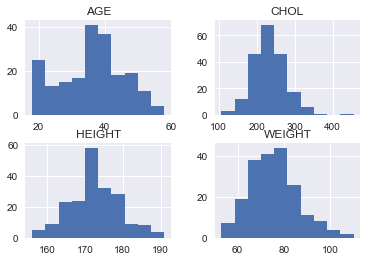

In [45]:
data.hist()

In [46]:
data_corr = data.corr()

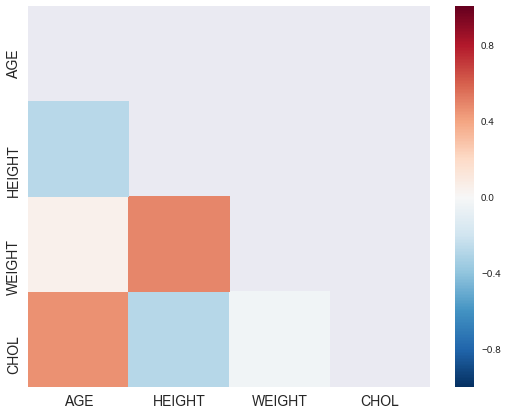

In [47]:
# Set the default matplotlib figure size to 7x7:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(data_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
data.WEIGHT.mean()

In [112]:
dict_smoke = {'nonsmo':0, 'sigare':1, 'pipe':1}
dict_mort = {'alive':0, 'dead':1}

In [113]:
data.MORT = data.MORT.map(dict_mort)

In [114]:
data.SMOKE.unique()
data.SMOKE = data.SMOKE.map(dict_smoke)

In [115]:
data.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,0,b,0
1,53,167,56,250,1,o,1
2,44,170,80,304,1,a,1
3,37,173,89,178,0,o,0
4,26,170,71,206,1,o,0


### Is there a difference in mortality between smokers, nonsmokers?

In [123]:
dead_smoker = data[(data.SMOKE == 1) ].MORT.values

In [127]:
alive_smoker = data[(data.SMOKE == 0) ].MORT.values

In [128]:
ttest_ind(dead_smoker,alive_smoker)

(0.94854180220332329, 0.34400997514429488, 198.0)

In [134]:
weght = data.WEIGHT.values
mean = 85

stats.ttest_1samp(weght,mean)

Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)